# Digits Image Classification

In [1]:
import mnist as mn
import numpy as np
import pandas as pd
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist
import time

# We import sklearn.
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)
## ML methods##

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from mlens.visualization import corrmat

#from sklearn.utils.extmath import _ravel
# Random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
#%matplotlib inline

#We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})


[MLENS] backend: threading


In [2]:
N = 5000 #Number of data we want to use in this project
data, target = mn.get_data(N) #Read the data
print(data.shape) #Each data point is 784 dimensional

(5000, 784)


## Data Reduction techniques

In [3]:
#First use PCA to reduce data into 50 dimensions to speed up computation in non-linear data reduction techniques
pca = PCA(n_components=50)
pca.fit(data)
W = pca.components_
pre_data = np.matmul(data, W.T)

Time taken to run TSNE is :  109.94469094276428


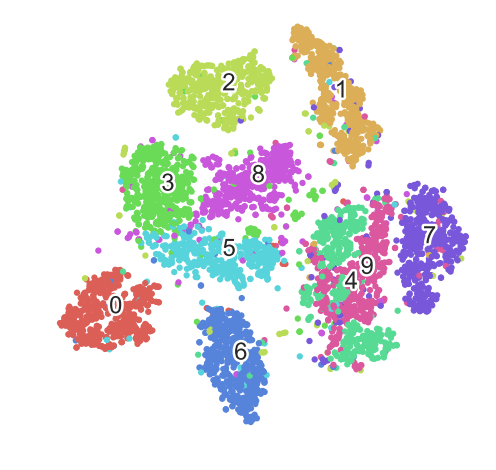

In [4]:
##TSNE nonlinear data reduction techniques
t0 = time.time()
digits_proj = TSNE(n_components=2, random_state=RS).fit_transform(pre_data)
print("Time taken to run TSNE is : ", time.time() - t0)
_ = mn.scatter(digits_proj, target)

Time taken to run Isomap is :  17.938634872436523


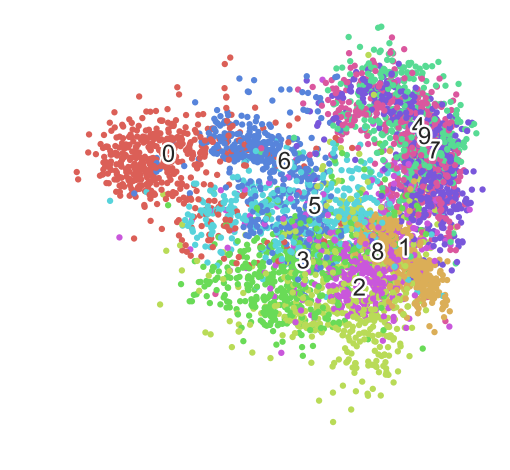

In [5]:
##Isomap##
t0 = time.time()
iso_proj = Isomap(n_components=2).fit_transform(pre_data)
print("Time taken to run Isomap is : ", time.time() - t0)
_ = mn.scatter(iso_proj, target)

Time taken to run LLE is :  3.351840019226074


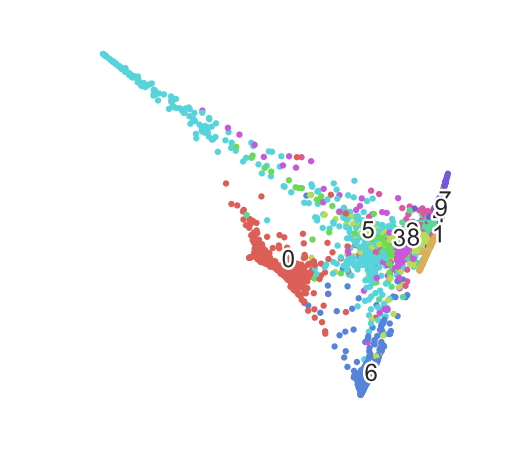

In [6]:
##LLE##
t0 = time.time()
lle_proj = LocallyLinearEmbedding(n_components=2).fit_transform(pre_data)
print("Time taken to run LLE is : ", time.time() - t0)
_ = mn.scatter(lle_proj, target)

Time taken to run PCA is :  0.024280786514282227


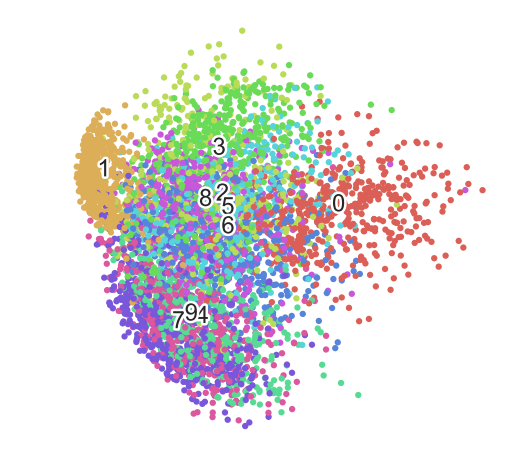

In [7]:
#PCA# linear data reductino techniques
pca = PCA(n_components=2)
t0 = time.time()
pca.fit(pre_data)
print("Time taken to run PCA is : ", time.time() - t0)
W = pca.components_
PCA_project = np.matmul(pre_data, W.T)
_ = mn.scatter(PCA_project, target)

Time taken to run MDS is :  99.23504424095154


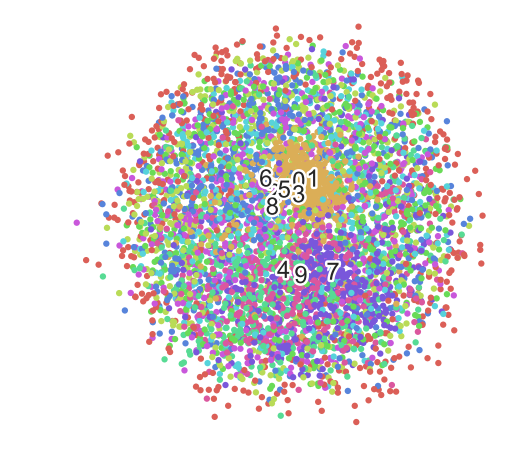

In [8]:
##mds###
clf = sklearn.manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time.time()
X_mds = clf.fit_transform(pre_data)
print("Time taken to run MDS is : ", time.time() - t0)
_ = mn.scatter(X_mds, target)

In [9]:
##Choose TSNE as our final data reduction techniques!
final_data = digits_proj
X_train, X_test, y_train, y_test = train_test_split(final_data, target, random_state=RS, test_size=0.25)
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = mn.make_meshgrid(X0, X1)

## Common Classification techniques 

### SVM 

Time taken to run SVM is :  1.6113388538360596
Training accuracy of SVM is :   0.9816
Test accuracy of SVM is :   0.9456


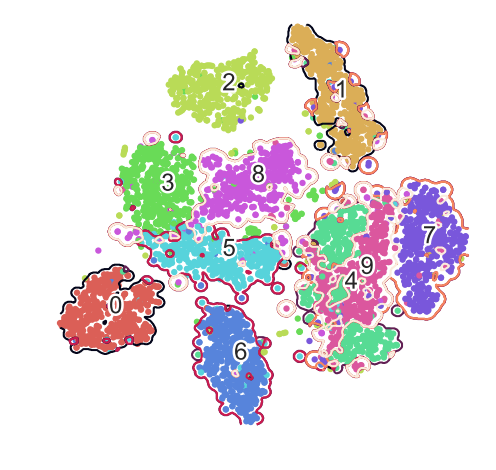

In [10]:
##SVM##
svc = SVC(C = 1,kernel='rbf')
t0 = time.time()
clf = svc.fit(X_train, y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
print("Time taken to run SVM is : ", time.time() - t0)
print("Training accuracy of SVM is :  ", accuracy_score(pred_train, y_train))
print("Test accuracy of SVM is :  ", accuracy_score(pred_test, y_test))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax = mn.scatter(digits_proj, target)
ax.contour(xx, yy, Z, linewidths=2)

### Naive Bayes 

Time taken to run Naive Bayes is :  0.005034208297729492
Training accuracy of Naive Bayes is :   0.844266666667
Test accuracy of Naive Bayes is :   0.8504


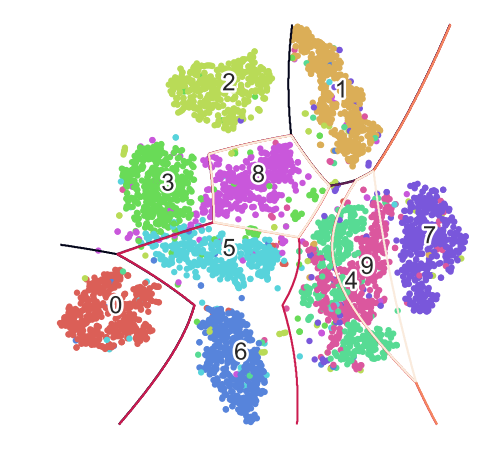

In [11]:
##Naive Bayes##
clf = GaussianNB()
t0 = time.time()
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
print("Time taken to run Naive Bayes is : ", time.time() - t0)
print("Training accuracy of Naive Bayes is :  ", accuracy_score(pred_train, y_train))
print("Test accuracy of Naive Bayes is :  ", accuracy_score(pred_test, y_test))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax = mn.scatter(digits_proj, target)
ax.contour(xx, yy, Z, linewidths=2)

### QDA 

Time taken to run QDA is :  0.0064809322357177734
Training accuracy of QDA is :   0.8576
Test accuracy of QDA is :   0.864


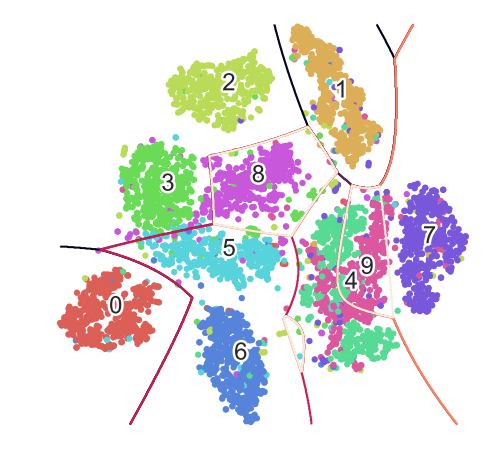

In [12]:
##QDA##

clf = QuadraticDiscriminantAnalysis()
t0 = time.time()
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
print("Time taken to run QDA is : ", time.time() - t0)
print("Training accuracy of QDA is :  ", accuracy_score(pred_train, y_train))
print("Test accuracy of QDA is :  ", accuracy_score(pred_test, y_test))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax = mn.scatter(digits_proj, target)
ax.contour(xx, yy, Z, linewidths=2)

### K Nearest Neighbors 

Time taken to run KNN is :  0.02504897117614746
Training accuracy of KNN is :   0.934933333333
Test accuracy of KNN is :   0.9424


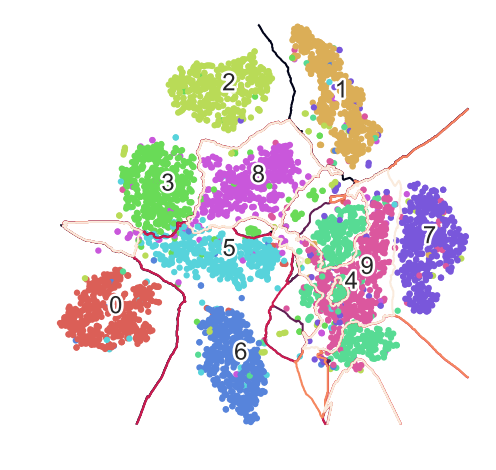

In [13]:
##KNN##
clf = KNeighborsClassifier(n_neighbors=10)
t0 = time.time()
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
print("Time taken to run KNN is : ", time.time() - t0)
print("Training accuracy of KNN is :  ", accuracy_score(pred_train, y_train))
print("Test accuracy of KNN is :  ", accuracy_score(pred_test, y_test))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax = mn.scatter(digits_proj, target)
ax.contour(xx, yy, Z, linewidths=2)

### Logistic Regression 

Time taken to run Logistic Regression is :  0.04225277900695801
Training accuracy of Logistic Regression is :   0.7944
Test accuracy of Logistic Regression is :   0.8072


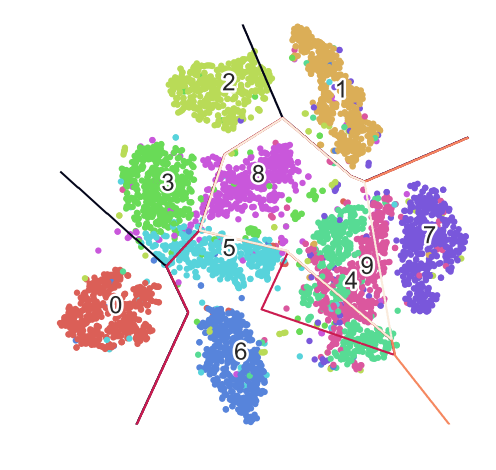

In [14]:
##Logistic regression##
clf = LogisticRegression()
t0 = time.time()
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
print("Time taken to run Logistic Regression is : ", time.time() - t0)
print("Training accuracy of Logistic Regression is :  ", accuracy_score(pred_train, y_train))
print("Test accuracy of Logistic Regression is :  ", accuracy_score(pred_test, y_test))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax = mn.scatter(digits_proj, target)
ax.contour(xx, yy, Z, linewidths=2)

### Random Forest 

In [15]:
##Random Forest##
clf = RandomForestClassifier(n_estimators=200)
t0 = time.time()
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
print("Time taken to run Random Forest is : ", time.time() - t0)
print("Training accuracy of Random Forest is :  ", accuracy_score(pred_train, y_train))
print("Test accuracy of Random Forest is :  ", accuracy_score(pred_test, y_test))

Time taken to run Random Forest is :  1.1283690929412842
Training accuracy of Random Forest is :   1.0
Test accuracy of Random Forest is :   0.9528


### Gradient Boosting


In [16]:
## Gradient Boosting
clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=6, subsample=1.0)
t0 = time.time()
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
print("Time taken to run Gradient Boosting is : ", time.time() - t0)
print("Training accuracy of Gradient Boosting is :  ", accuracy_score(pred_train, y_train))
print("Test accuracy of Gradient Boosting is :  ", accuracy_score(pred_test, y_test))

Time taken to run Gradient Boosting is :  3.839479684829712
Training accuracy of Gradient Boosting is :   1.0
Test accuracy of Gradient Boosting is :   0.9416


## Model Ensembling

In [26]:
## Some helper functions
def get_models():
    """Generate a library of base learners."""
    #nb = (GaussianNB())
    svc = (SVC(C = 1,kernel='rbf', probability=True))
    knn = (KNeighborsClassifier(n_neighbors=10))
    #lr = (LogisticRegression())
    #qda = (QuadraticDiscriminantAnalysis())
    gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=6, subsample=1.0)
    rf = RandomForestClassifier(n_estimators=200)

    models = {'svm': svc,
              'knn': knn,
              #'naive bayes': nb,
              #'qda': qda,
              'rf': rf,
              'gbm': gb,
              #'logistic': lr,
              }

    return models

def train_predict(model_list):
    """Fit models in list on training set and return preds"""
    P = np.zeros((y_test.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(X_train, y_train)
        P.iloc[:, i] = m.predict(X_test)
        cols.append(name)
    P.columns = cols
    print("Done.\n")
    return P

def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    for m in P.columns:
        score = accuracy_score(y_test, P.loc[:, m])
        print("%-26s: %.3f" % (m, score))

def predict_prob(model_list):
    P_proba = np.zeros((len(model_list), y_test.shape[0], 10))
    print("Fitting models.")
    for i, (name, m) in enumerate(model_list.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(X_train, y_train)
        P_proba[i] = m.predict_proba(X_test)
    print("\n")

    return P_proba

In [27]:
models = get_models()
P = train_predict(models)
score_models(P, y_test)

Fitting models.
svm... knn... rf... gbm... Done.

Scoring models.
svm                       : 0.946
knn                       : 0.942
rf                        : 0.951
gbm                       : 0.941


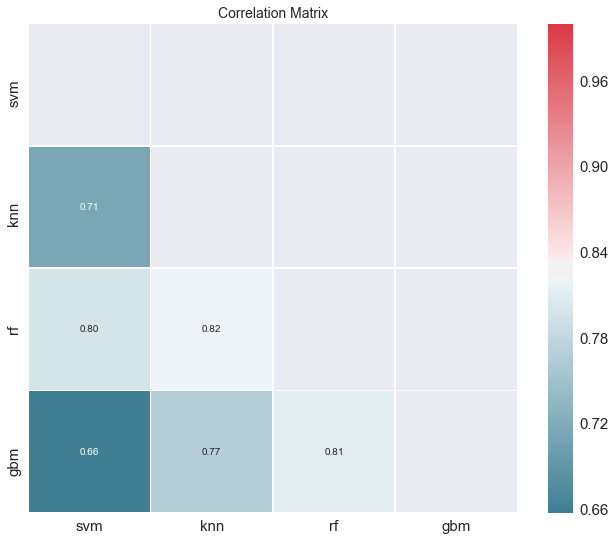

In [28]:
P_c = P.apply(lambda pred: (pred - y_test))
P_c[P_c != 0] = 1
_ = corrmat(P_c.corr(), inflate=False)

## Average Ensembling Model 

In [29]:
P_proba = predict_prob(models)
P_ave = np.mean(P_proba, axis=0)
y_average = np.argmax(P_ave, axis=1)
print("The accuracy percentage of average ensembling model is : ", accuracy_score(y_test, y_average))


Fitting models.
svm... knn... rf... gbm... 

The accuracy percentage of average ensembling model is :  0.9536


## True Ensembling Model (Add Meta Learner)

In [35]:
def train_base_learners(base_learners, inp, out, verbose=True):
    """Train all base learners in the library."""
    if verbose: print("Fitting models.")
    for i, (name, m) in enumerate(base_learners.items()):
        if verbose: print("%s..." % name, end=" ", flush=False)
        m.fit(inp, out)
        if verbose: print("done")

            
def predict_base_learners(pred_base_learners, inp, verbose=True):
    """Generate a prediction matrix."""
    P = np.zeros((inp.shape[0], 10, len(pred_base_learners)))

    if verbose: print("Generating base learner predictions.")
    for i, (name, m) in enumerate(pred_base_learners.items()):
        if verbose: print("%s..." % name, end=" ", flush=False)
        p = m.predict_proba(inp)
        # With two classes, need only predictions for one class
        P[:, :,i] = p
        if verbose: print("done")

    return P

def ensemble_predict(base_learners, meta_learner, inp, verbose=True):
    """Generate predictions from the ensemble."""
    P_pred = predict_base_learners(base_learners, inp, verbose=verbose)
    P_pred = P_pred.reshape(P_pred.shape[0], P_pred.shape[1] * P_pred.shape[2])
    return P_pred, meta_learner.predict(P_pred)

In [36]:
#step1 Define base learners
base_learners = get_models()


#step2 Define a meta learner


meta_learner = GradientBoostingClassifier(
    n_estimators=1000,
    max_features=4,
    max_depth=3,
    subsample=0.5,
    learning_rate=0.005, 
    random_state=RS
)


#Split the training set
xtrain_base, xpred_base, ytrain_base, ypred_base = train_test_split(
    X_train, y_train, test_size=0.5, random_state=RS)


In [32]:
#Train base learners on the training set
train_base_learners(base_learners, xtrain_base, ytrain_base)

Fitting models.
svm... done
knn... done
rf... done
gbm... done


In [33]:
#Predict on the base models
P_base = predict_base_learners(base_learners, xpred_base)
P_base = P_base.reshape(P_base.shape[0], P_base.shape[1] * P_base.shape[2])

Generating base learner predictions.
svm... done
knn... done
rf... done
gbm... done


In [34]:
#Fit and predict on meta learner
meta_learner.fit(P_base, ypred_base)
P_pred, p = ensemble_predict(base_learners, meta_learner, X_test, verbose=False)
print("True Ensemble accuracy score: %.3f" % accuracy_score(y_test, p))

True Ensemble accuracy score: 0.941
